<a href="https://colab.research.google.com/github/unanida/IT-BI2022/blob/main/ITB_Mid_kyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**전체 응답자의 성비 확인**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel("MF_Kg.xlsx")
display(df) 

,MF,Kg
0,M,60
1,F,65
2,F,55
3,M,70
4,F,50
...,...,...
9995,F,55
9996,F,55
9997,M,80
9998,F,55


      Kg
MF      
F   4862
M   5138


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


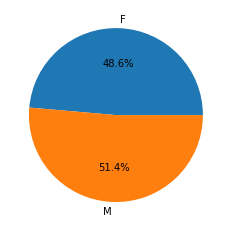

In [ ]:
#is_M = df['MF'] == 'M'
import matplotlib as mpl               # 기본 설정
import matplotlib.pyplot as plt        # 그래프 관련
import matplotlib.font_manager as fm
x = df.groupby('MF').count()
print(x)
#plt.figure(figsize(5,5))
plt.pie(x,labels=['F','M'],autopct='%.1f%%')
plt.show()

**원본 데이터 불러오기**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib as mpl               
import matplotlib.pyplot as plt        
import matplotlib.font_manager as fm

df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/health_data.csv')
df

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2020,9996,44,F,13,155,55,83.0,1.2,1.2,...,0.7,20.0,21.0,20.0,No,Yes,0,NaN,NaN,12/29/2021
9996,2020,9997,43,F,11,160,55,77.5,1.0,1.2,...,0.7,24.0,22.0,21.0,No,Yes,1,0.0,0.0,12/29/2021
9997,2020,9998,45,M,12,160,80,93.0,0.6,0.6,...,1.0,22.0,27.0,35.0,No,No,0,NaN,NaN,12/29/2021
9998,2020,9999,27,F,15,155,55,78.0,0.6,1.0,...,1.0,26.0,24.0,21.0,No,No,0,NaN,NaN,12/29/2021


**주제1. 성별에 따른 음주,흡연 여부**

In [2]:
print(df.isnull().sum()) # 결측치 확인
df_alc_tob = df[['성별코드','흡연상태','음주여부']]
df_alc_tob = df_alc_tob.dropna() # 결측치 제거

기준년도              0
가입자일련번호           0
시도코드              0
성별코드              0
연령대코드(5세단위)       0
신장(5Cm단위)         0
체중(5Kg 단위)        0
허리둘레              0
시력(좌)             0
시력(우)             0
청력(좌)             0
청력(우)             0
수축기혈압            88
이완기혈압            88
식전혈당(공복혈당)       88
총콜레스테롤         5956
트리글리세라이드       5956
HDL콜레스테롤       5956
LDL콜레스테롤       6023
혈색소              88
요단백             139
혈청크레아티닌          88
(혈청지오티)AST       88
(혈청지오티)ALT       88
감마지티피            88
흡연상태              2
음주여부              1
구강검진수검여부          0
치아우식증유무        6749
치석             6749
데이터공개일자           0
dtype: int64


In [3]:
df_alc_tob
df_alc_tob.replace('NotNow','No',inplace=True) # NotNow상태 No로 통일

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df_male = df_alc_tob[df_alc_tob['성별코드']=='M'] # 남자의 흡연,음주 데이터 프레임 분리
df_female = df_alc_tob[df_alc_tob['성별코드']=='F'] # 여자의 흡연,음주 데이터 프레임 분리

In [6]:
#남자 음주,흡연 여부
male_both = (df_male.음주여부 == 'Yes') &(df_male.흡연상태 == 'Yes')
male_only_alc = (df_male.음주여부 == 'Yes') &(df_male.흡연상태 == 'No')
male_only_tob = (df_male.음주여부 == 'No') &(df_male.흡연상태 == 'Yes')
male_not = (df_male.음주여부 == 'No') &(df_male.흡연상태 == 'No')
#여자 음주,흡연 여부
female_both = (df_female.음주여부 == 'Yes') &(df_female.흡연상태 == 'Yes')
female_only_alc = (df_female.음주여부 == 'Yes') &(df_female.흡연상태 == 'No')
female_only_tob = (df_female.음주여부 == 'No') &(df_female.흡연상태 == 'Yes')
female_not = (df_female.음주여부 == 'No') &(df_female.흡연상태 == 'No')

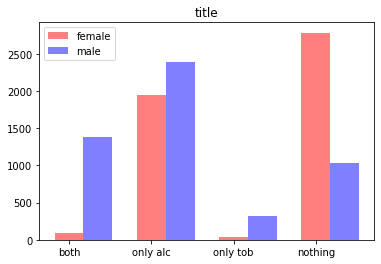

In [7]:
female_res = np.array([df_female.loc[female_both,['음주여부']].count(),df_female.loc[female_only_alc,['음주여부']].count(),df_female.loc[female_only_tob,['음주여부']].count(),df_female.loc[female_not,['음주여부']].count()]) # 흡연,음주 별 인원수 배열로 정리
male_res = np.array([df_male.loc[male_both,['음주여부']].count(),df_male.loc[male_only_alc,['음주여부']].count(),df_male.loc[male_only_tob,['음주여부']].count(),df_male.loc[male_not,['음주여부']].count()])
fmr = np.concatenate(female_res).tolist() # 배열로 정리된 데이터 1차원 리스트로 변경 (그래프 그리기 위함)
mr = np.concatenate(male_res).tolist()
X=np.arange(4)
label = ['both','only alc','only tob','nothing']


g1 = plt.bar(X,fmr,0.35, color='r',alpha=0.5,label='female')
g2 = plt.bar(X+0.35,mr,0.35, color='b',alpha=0.5,label='male')

plt.title('title')
plt.xticks(X,label,fontsize=10)
plt.legend()
plt.show()

***주제1에 대한 결과 해석***

2019년도 건강 데이터를 성별에 따른 음주, 흡연 인구로 나누어 시각화한 결과 음주와 흡연을 동시에 하는 인구는 남성이 월등히 많게 나타났으며, 반대로 음주 흡연을 전부 하지 않는 인구는 여성이 월등히 많았다.

음주만 하는 인구의 경우는 흡연만 하는 인구보다 훨씬 많았는데, 다만 음주만 하는 경우 남녀 성별의 차이는 두드러지지 않았다. 음주나 흡연 중 하나만 하는 인구의 경우에도 그 정도의 차이는 있지만 모두 남성이 더 많았다.

**주제2. 신장 길이와 시력의 연관성**

In [8]:
df_h = df[['신장(5Cm단위)']]
df_v = df[['시력(좌)','시력(우)']]
df_v.columns = ['left_vision','right_vision']
vision_avg = (df_v.left_vision+df_v.right_vision)/2

In [9]:
df_hv = pd.concat([df_h,vision_avg],axis=1)
df_hv.columns = ['height','vision']
df_hv

,height,vision
0,165,1.35
1,150,0.80
2,155,0.65
3,160,1.00
4,155,1.35
...,...,...
9995,155,1.20
9996,160,1.10
9997,160,0.60
9998,155,0.80


Text(0, 0.5, 'vision')

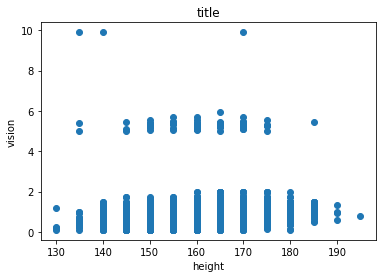

In [10]:
plt.scatter(df_hv['height'],df_hv['vision'])
plt.title('title')
plt.xlabel('height')
plt.ylabel('vision')

Text(0, 0.5, 'vision')

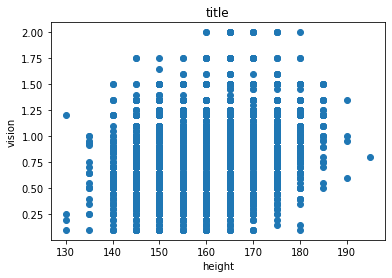

In [11]:
# 데이터에 포함돼 있는 비정상적인 값들 수정 후 다시 그래프 출력
df_v2 = df_v.replace(9.9,df_v.mean())
df_v2.columns = ['left_vision','right_vision']
vision_avg = (df_v2.left_vision+df_v2.right_vision)/2
df_hv2 = pd.concat([df_h,vision_avg],axis=1)
df_hv2.columns = ['height','vision']

plt.scatter(df_hv2['height'],df_hv2['vision'])
plt.title('title')
plt.xlabel('height')
plt.ylabel('vision')

**주제2에 대한 결과 해석**

신장 길이와 시력의 연관성을 확인하기 위해 산점도 그래프를 통한 시각화를 진행한 결과 대한민국 표준 남성-여성의 신장인 150-170cm 사이에 연속적인 분포를 확인할 수 있었다. 

통상 물체를 정상적으로 식별할 수 있는 것을 정상시력 1.0으로 보았을 때, 정상 시력 미만의 경우 연속적인 분포를 보인 반면 정상시력 이상의 시력 분포는 다소 불연속적이었다.

신장과 시력의 연관성을 살펴보면 신장 140-180cm 범위에서는 신장 길이가 길수록 시력이 좋다는 것을 추론할 수 있으나 데이터가 크게 유의미하지 않은 것 같다. 신장의 단위가 5cm 인 것도 아쉬운 부분이다.

**주제3. 비만 기준인 bmi 25.0 이상인 사람들의 허리둘레 분포도**

---



In [12]:
df_cal_bmi = df[['체중(5Kg 단위)','신장(5Cm단위)']]
df_cal_bmi.columns = ['weight','height']
bmi = df_cal_bmi.weight / ((df_cal_bmi.height/100) * (df_cal_bmi.height/100))

bmi

0       22.038567
1       28.888889
2       22.892820
3       27.343750
4       20.811655
          ...    
9995    22.892820
9996    21.484375
9997    31.250000
9998    22.892820
9999    29.296875
Length: 10000, dtype: float64

In [13]:
df_bmi_base =df.drop(['기준년도','가입자일련번호','시도코드','시력(좌)','시력(우)','청력(좌)','청력(우)','요단백','구강검진수검여부','치아우식증유무','치석','데이터공개일자','신장(5Cm단위)','체중(5Kg 단위)'],axis=1)
df_bmi_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   성별코드         10000 non-null  object 
 1   연령대코드(5세단위)  10000 non-null  int64  
 2   허리둘레         10000 non-null  float64
 3   수축기혈압        9912 non-null   float64
 4   이완기혈압        9912 non-null   float64
 5   식전혈당(공복혈당)   9912 non-null   float64
 6   총콜레스테롤       4044 non-null   float64
 7   트리글리세라이드     4044 non-null   float64
 8   HDL콜레스테롤     4044 non-null   float64
 9   LDL콜레스테롤     3977 non-null   float64
 10  혈색소          9912 non-null   float64
 11  혈청크레아티닌      9912 non-null   float64
 12  (혈청지오티)AST   9912 non-null   float64
 13  (혈청지오티)ALT   9912 non-null   float64
 14  감마지티피        9912 non-null   float64
 15  흡연상태         9998 non-null   object 
 16  음주여부         9999 non-null   object 
dtypes: float64(13), int64(1), object(3)
memory usage: 1.3+ MB


In [14]:
df_bmi_base.fillna(df_bmi_base.mean())
df_bmi_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   성별코드         10000 non-null  object 
 1   연령대코드(5세단위)  10000 non-null  int64  
 2   허리둘레         10000 non-null  float64
 3   수축기혈압        9912 non-null   float64
 4   이완기혈압        9912 non-null   float64
 5   식전혈당(공복혈당)   9912 non-null   float64
 6   총콜레스테롤       4044 non-null   float64
 7   트리글리세라이드     4044 non-null   float64
 8   HDL콜레스테롤     4044 non-null   float64
 9   LDL콜레스테롤     3977 non-null   float64
 10  혈색소          9912 non-null   float64
 11  혈청크레아티닌      9912 non-null   float64
 12  (혈청지오티)AST   9912 non-null   float64
 13  (혈청지오티)ALT   9912 non-null   float64
 14  감마지티피        9912 non-null   float64
 15  흡연상태         9998 non-null   object 
 16  음주여부         9999 non-null   object 
dtypes: float64(13), int64(1), object(3)
memory usage: 1.3+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [15]:
df_bmi = pd.concat([df_bmi_base,bmi],axis=1)
df_bmi.rename(columns = {0:'bmi'},inplace=True)
df_bmi.head()

,성별코드,연령대코드(5세단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,bmi
0,M,9,72.1,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.1,21.0,27.0,21.0,No,No,22.038567
1,F,13,81.0,110.0,73.0,87.0,NaN,NaN,NaN,NaN,12.7,0.5,18.0,15.0,15.0,No,No,28.888889
2,F,12,70.0,123.0,80.0,102.0,NaN,NaN,NaN,NaN,12.8,0.7,27.0,25.0,7.0,No,No,22.892820
3,M,13,90.8,134.0,84.0,146.0,NaN,NaN,NaN,NaN,16.4,1.2,65.0,97.0,72.0,No,No,27.343750
4,F,12,75.2,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,0.7,18.0,17.0,14.0,No,No,20.811655


In [16]:
df_bmi.replace('NotNow',0,inplace=True)
df_bmi.replace('No',0,inplace=True)
df_bmi.replace('Yes',1,inplace=True)
df_bmi.replace('M',0,inplace=True)
df_bmi.replace('F',1,inplace=True)
df_bmi.head()

,성별코드,연령대코드(5세단위),허리둘레,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,bmi
0,0,9,72.1,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.1,21.0,27.0,21.0,0.0,0.0,22.038567
1,1,13,81.0,110.0,73.0,87.0,NaN,NaN,NaN,NaN,12.7,0.5,18.0,15.0,15.0,0.0,0.0,28.888889
2,1,12,70.0,123.0,80.0,102.0,NaN,NaN,NaN,NaN,12.8,0.7,27.0,25.0,7.0,0.0,0.0,22.892820
3,0,13,90.8,134.0,84.0,146.0,NaN,NaN,NaN,NaN,16.4,1.2,65.0,97.0,72.0,0.0,0.0,27.343750
4,1,12,75.2,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,0.7,18.0,17.0,14.0,0.0,0.0,20.811655


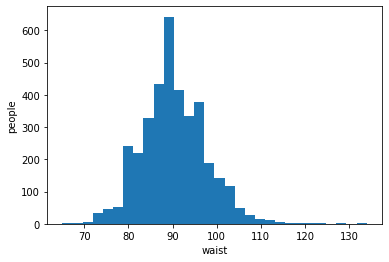

In [17]:

plt.hist(x=[df_bmi.허리둘레[df_bmi.bmi >= 25]],bins=30, histtype ='barstacked')
plt.xlabel('waist')
plt.ylabel('people')

plt.show()

**주제3에 대한 결과 해석**

BMI지수 변수를 생성하여 비만인 사람들에 대한 허리둘레를 막대그래프로 확인해보았다.

그 결과 허리둘레가 80 후반에서 90cm 정도에 가장 많이 분포해있음을 확인할 수 있었다.

